# Week 2: Notebook 2 - Regression

# Part 1

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model

Create a function that generates data from a model $y=\beta_0+\beta_1*x+\epsilon \text{   } $. We give you the first line (signature):

>def generate_simple_model(X, beta0, beta1, sigma):

where X is a vector (1d numpy array) with values of the feature variable x, beta0 and beta1 are the parameters, and sigma is the standard deviation of the error term. The function should return the modelled values of $y$

In [2]:
def generate_simple_model(X, beta0, beta1, sigma):
  return beta0 + beta1*X + np.random.normal(scale=sigma, size=len(X)) 

This function will allow you to create data to play with, below. 

Let's just test it, with a model that is $y=-1+3*x+N(0,\sigma^2)\text{   }$ (i.e. standard deviation is $\sigma$, variance is $\sigma^2$)

First, with NO error ($\sigma=0$)!

24


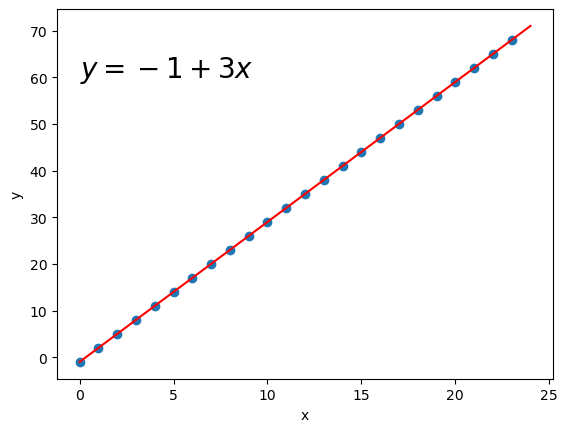

In [3]:
Xe=np.arange(24)    
ye=generate_simple_model(Xe, -1, 3, 0)#[-1+3*x for x in Xe] # NOTE: This is the function that you generated above
print(len(Xe))

plt.scatter(Xe, ye)
plt.annotate('$y=-1+3x$', xy=(0, 60), xytext=(0, 60), fontsize=20)
plt.plot([0,24], [-1, 71], color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now, with a little bit of error ($\sigma=9$)

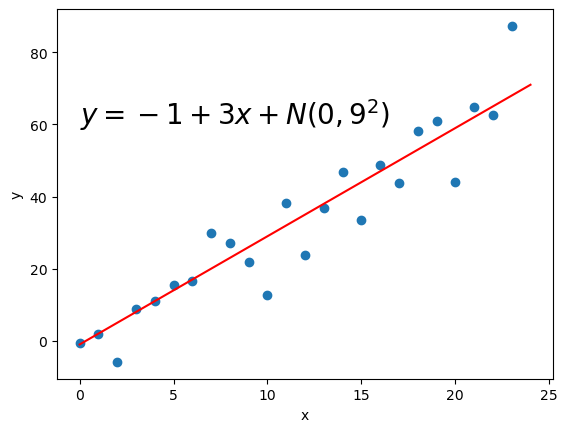

In [4]:
sigma=9
ye=generate_simple_model(Xe, -1, 3, sigma)

plt.scatter(Xe, ye)
plt.annotate('$y=-1+3x+N(0,9^2)$', xy=(0, 60), xytext=(0, 60), fontsize=20)
plt.plot([0,24], [-1, 71], color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

This is just ONE sample (i.e. one possible dataset) that could be generated by our simple model. It is important to see that each model actually implies a full distribution of data.

To make this point more clear, let's generate a very large number (e.g. 500) of samples and plot them at the same time.

We generate them, you plot them, ok? ;-)

In [5]:
Xe=np.arange(0, 24, 0.01)    
N_fun=500  #number of samples to generate
ys=[]
for i in range(N_fun):
    ys.append(generate_simple_model(Xe, -1, 3, 9))

Y=np.matrix(ys)

Take a look at the array Xe and matrix Y. They contain all the data. You can all check the sizes. Note also that ys is a list of numpy arrays whereas Y is numpy matrix.  

In [6]:
print('Xe', Xe, Xe.size)
print('Y', Y, Y.size)
print('ys', ys)
print(len(ys))

Xe [0.000e+00 1.000e-02 2.000e-02 ... 2.397e+01 2.398e+01 2.399e+01] 2400
Y [[ -0.26399418   5.18128743   4.32306109 ...  63.37205742  65.00616986
   78.36180749]
 [ -1.65635857  -5.30238853 -11.7361532  ...  60.72605633  65.29964568
   77.8340588 ]
 [-16.8896297    0.74741624  -7.58219313 ...  78.45412873  78.63963891
   69.6421851 ]
 ...
 [  1.92764002  -1.93702703  32.7619293  ...  67.41766063  67.62655874
   79.89504235]
 [ -5.66021293   0.53528097   0.09321893 ...  79.38503533  66.62128597
   73.51690099]
 [-10.67232308   5.26948512  -6.94106424 ...  74.34134659  88.6432549
   75.68111373]] 1200000
ys [array([-0.26399418,  5.18128743,  4.32306109, ..., 63.37205742,
       65.00616986, 78.36180749]), array([ -1.65635857,  -5.30238853, -11.7361532 , ...,  60.72605633,
        65.29964568,  77.8340588 ]), array([-16.8896297 ,   0.74741624,  -7.58219313, ...,  78.45412873,
        78.63963891,  69.6421851 ]), array([ 0.48257232, -7.6652989 ,  6.77328077, ..., 66.2793484 ,
       59.45

Can you now plot/visualize all the data in ys using a scatter plot?

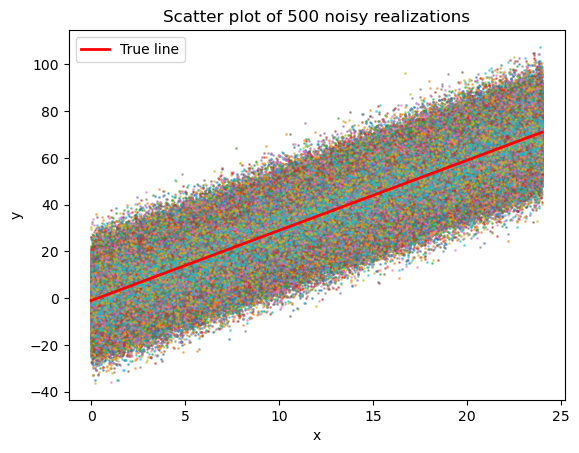

In [7]:
for y in ys:
    plt.scatter(Xe, y, s=1, alpha=0.5)
    
plt.plot(Xe, -1 + 3*Xe, color="red", linewidth=2, label="True line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of 500 noisy realizations")
plt.legend()
plt.show()

What does this mean? 

An interesting way to look is to do like a "vertical cut" of the graph (like a cross-section, or transversal cut). 

Make a histogram of the data at x=10 and at x=20. Can you see them in the figure above? (HINT: Here, it may be easier to use the matrix Y that we created)

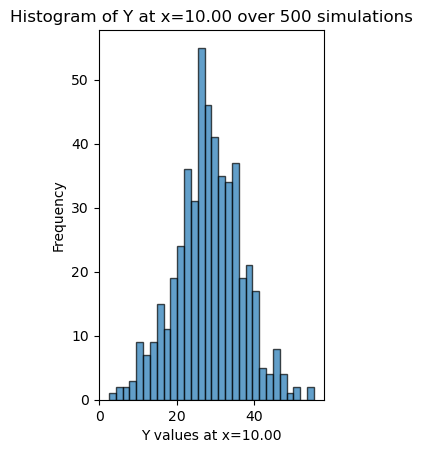

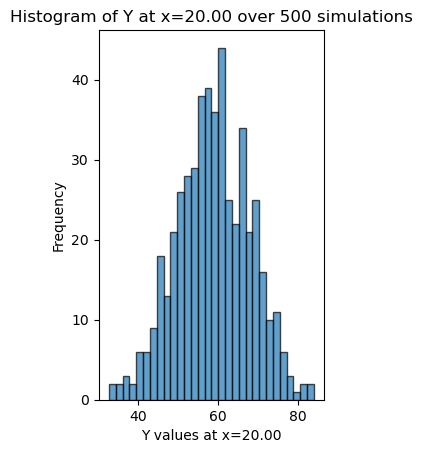

In [8]:
x_target_1 = 10
x_target_2 = 20
idx_1 = np.argmin(np.abs(Xe - x_target_1))
idx_2 = np.argmin(np.abs(Xe - x_target_2))
y_values_1 = Y[:, idx_1]
y_values_2 = Y[:, idx_2]

# plot histogram

plt.subplot(1,2,1)
plt.hist(y_values_1, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel(f"Y values at x={Xe[idx_1]:.2f}")
plt.ylabel("Frequency")
plt.title(f"Histogram of Y at x={Xe[idx_1]:.2f} over {N_fun} simulations")
plt.show()


plt.subplot(1,2,2)
plt.hist(y_values_2, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel(f"Y values at x={Xe[idx_2]:.2f}")
plt.ylabel("Frequency")
plt.title(f"Histogram of Y at x={Xe[idx_2]:.2f} over {N_fun} simulations")
plt.show()




----------------

# Part 2

Create a function that implements the linear regression estimator, based on the slides (Least Squares estimator). 

It should look like:

>def my_lin_reg(x, y):
>
>      \# put your code here... ;-)
>
>      return beta0, beta1



In [9]:

def my_lin_reg(x, y):
  mean_x=np.mean(x)
  mean_y=np.mean(y)

  sum1 = 0
  for i in range(len(y)):
    sum1 += (y[i]-mean_y)*(x[i] - mean_x)

  sum2 = 0
  for j in range(len(x)):
    sum2 += (x[j] - mean_x)**2
  beta1 = sum1/sum2
  beta0 = np.mean(y) - beta1*np.mean(x)

  return beta0, beta1



Now, let's use a small dataset, just to try your solution!

In [10]:
x=np.arange(10)
print(np.dot(x.T,x))
y=generate_simple_model(x, -1, 3, 9)
beta0, beta1 = my_lin_reg(x,y)
print("my linear regression: \n beta0=%f, beta1=%f"%(beta0, beta1))

285
my linear regression: 
 beta0=1.835995, beta1=2.934736


Ok, now you were able to estimate the parameters of the linear regression (the values of betas). The only missing part is how to predict. In  other words, given a new input, x, what is the respective (predicted) y?

Can you write the function? It should look like:

> def predict(x, beta0, beta1):
>        \# ... put your code here ;-)
>
>        return y

In [11]:
def predict(x, beta0, beta1):
  return beta0 + beta1*x

Congrats, you have built your own first Machine Learning Regression algorithm!

...sadly, you didn't have to. You could have used sklearn!... 

**sklearn is a VERY popular Python module in Data Sciences. Make sure you have it installed.**

This is how it would look like, with sklearn (this will be explained in detail in the next part of the lecture):

In [12]:
regr=linear_model.LinearRegression(fit_intercept=False)
x_= np.c_[np.ones(len(x)),np.array(x)]
regr.fit(x_, y)
print("sklearn linear regression:", regr.coef_)

sklearn linear regression: [1.83599452 2.93473566]


You should find almost no difference...

The same for predictions...

In [13]:
print(predict(x, beta0, beta1))
print(regr.predict(x_))

[ 1.83599452  4.77073019  7.70546585 10.64020151 13.57493718 16.50967284
 19.44440851 22.37914417 25.31387983 28.2486155 ]
[ 1.83599452  4.77073019  7.70546585 10.64020151 13.57493718 16.50967284
 19.44440851 22.37914417 25.31387983 28.2486155 ]


Obviously equal...

You should also notice that there can be quite some substantial error in the beta estimates (compare the results you get with the "true" model...).

Notice that you have a very small dataset (10 points). The question arises: does the error become smaller with larger datasets?

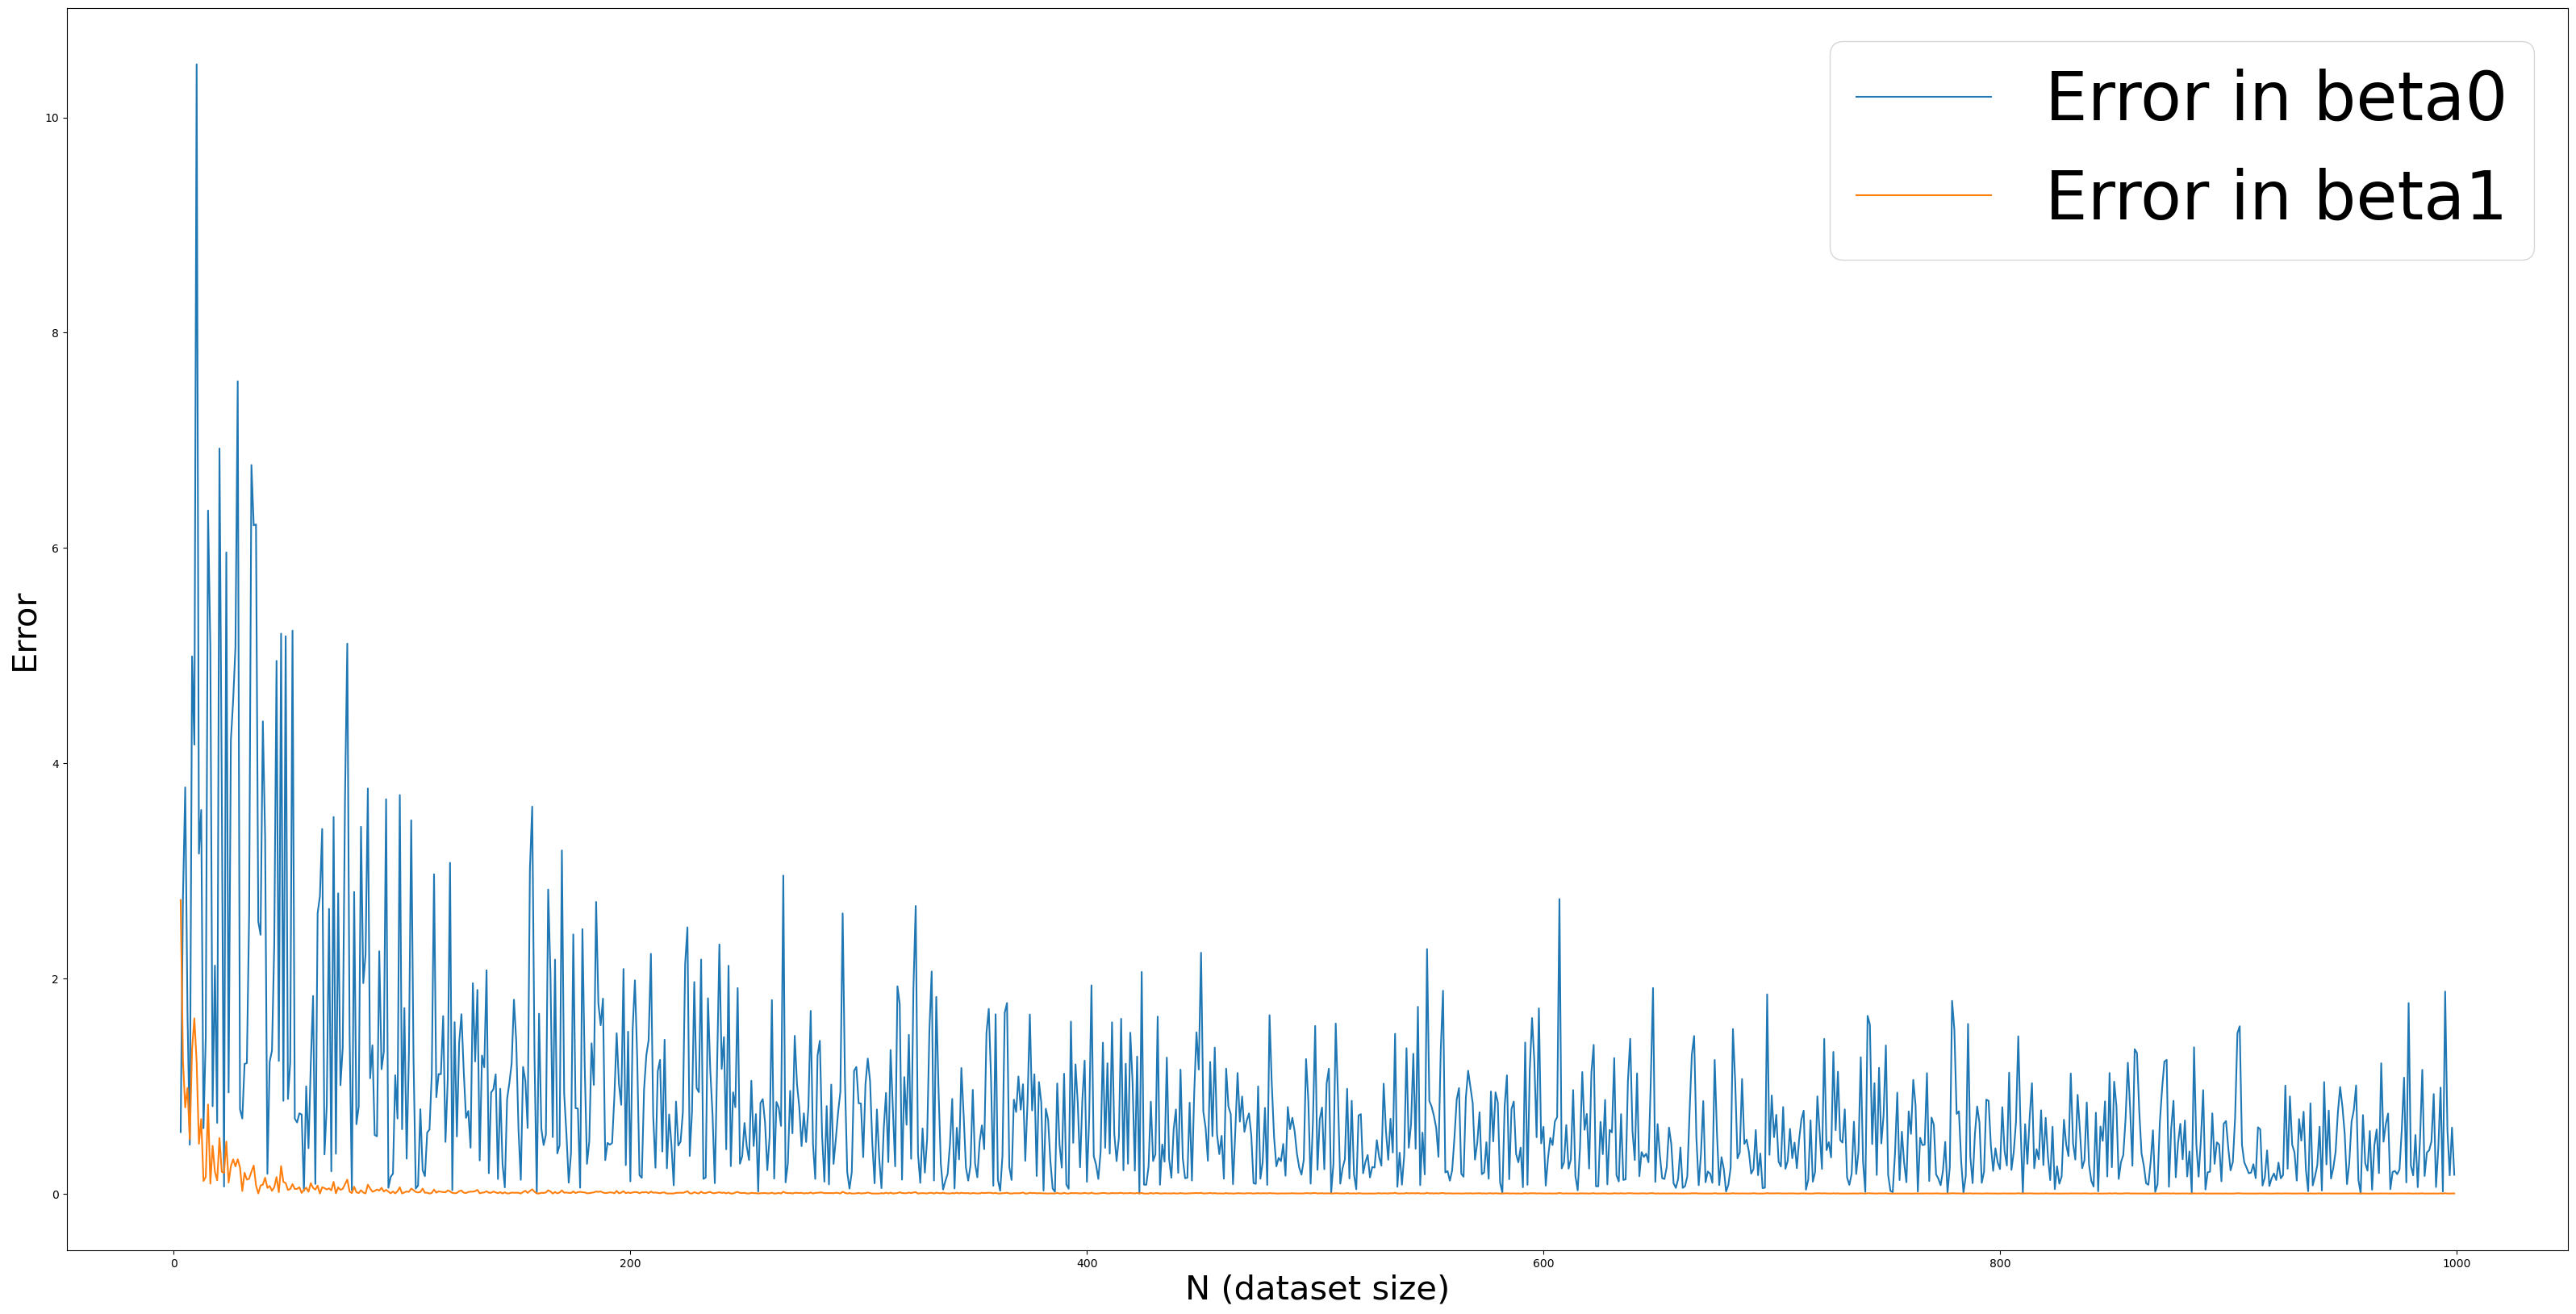

In [14]:

trueBeta0=-1
trueBeta1=3
trueSigma=9
N=np.arange(3, 1000)
diff0=[]
diff1=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    diff0.append(abs(trueBeta0-beta0))
    diff1.append(abs(trueBeta1-beta1))
    
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, diff0, label="Error in beta0")
plt.plot(N, diff1, label="Error in beta1")
plt.legend(prop={'size':60})
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()


Interesting, isn't it? Notice that the intercept converges much slower than the coefficient of x. For more information on why this happens see the equations for the standard error in the parameter estimates (Equation 3.8 on page 75 of the Intro to Statistical Learning textbook). 

Let's now check how the model is able to approximate sigma (the standard deviation of the error term) as the number of data points grow. Note that an unbiased estimate of sigma from our training data is given by: $\hat{\sigma}^2=\frac{e^T e}{n-2}$, where $e$ is the vector of residuals (we won't get into the technical details of this). 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/3b/_701tnqj0_545vycfpjds_1r0000gn/T/ipykernel_22680/3018236422.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(N, sigma, label="Error in sigma ($\sigma^{true}-\sigma^{estimated}$)")


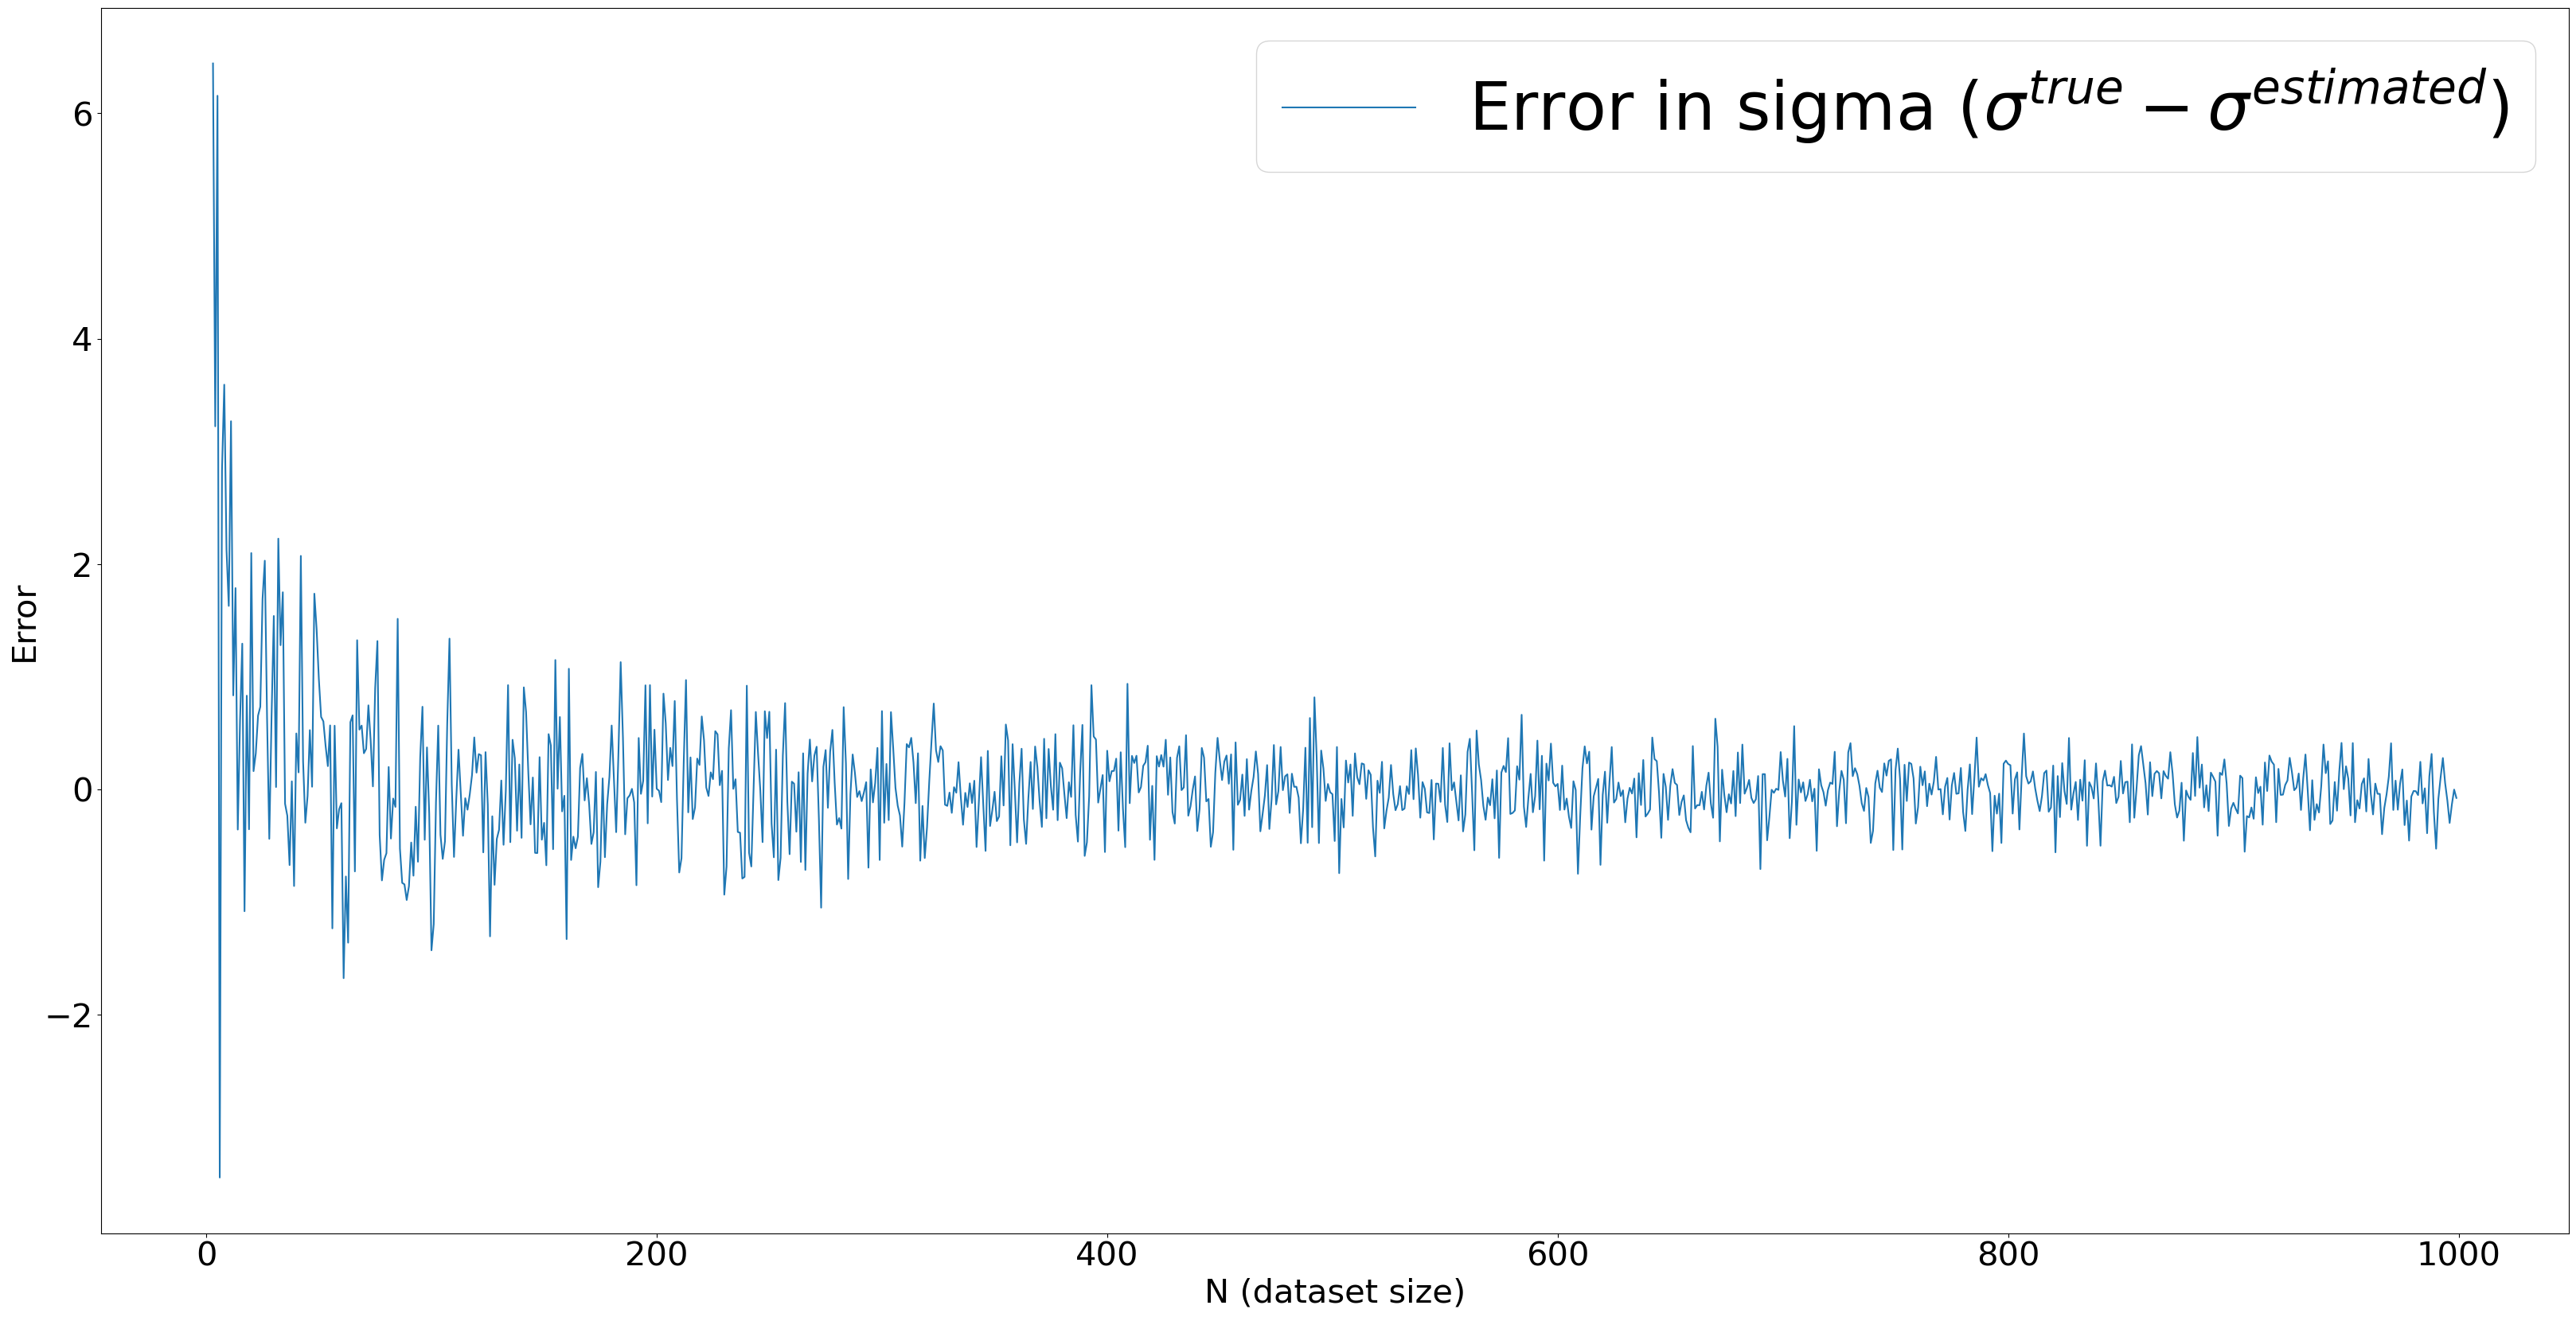

In [15]:
trueSigma=9
N=np.arange(3, 1000)
sigma=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    predictions=np.array([predict(xj, beta0, beta1) for xj in x])
    sigma.append(trueSigma-np.sqrt(np.dot(predictions-np.array(y), predictions-np.array(y))/(n-2)))
    
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, sigma, label="Error in sigma ($\sigma^{true}-\sigma^{estimated}$)")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()




It seems to converge a bit...

Another way to look at this is to see the distribution (histogram) of sigma as more data is available. Can you plot that graph?


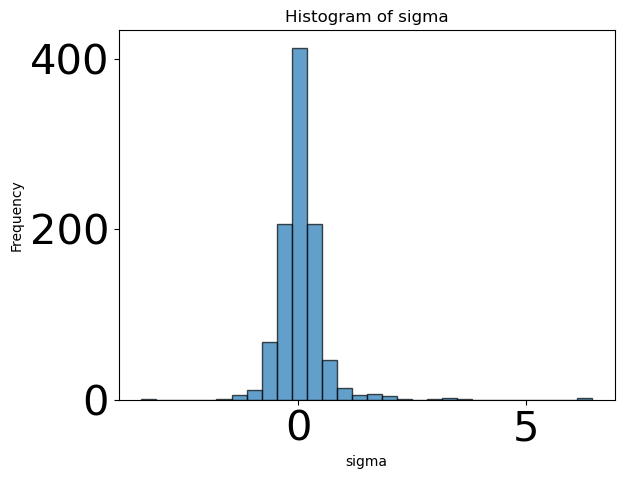

In [16]:

plt.hist(sigma, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("sigma")
plt.ylabel("Frequency")
plt.title(f"Histogram of sigma")
plt.show()

Now let's go a bit more crazy, and add much more datapoints... 

**IMPORTANT: this may take a long time, may too long, depending on your computer. That's why we leave a pre-generated picture in the notebook**

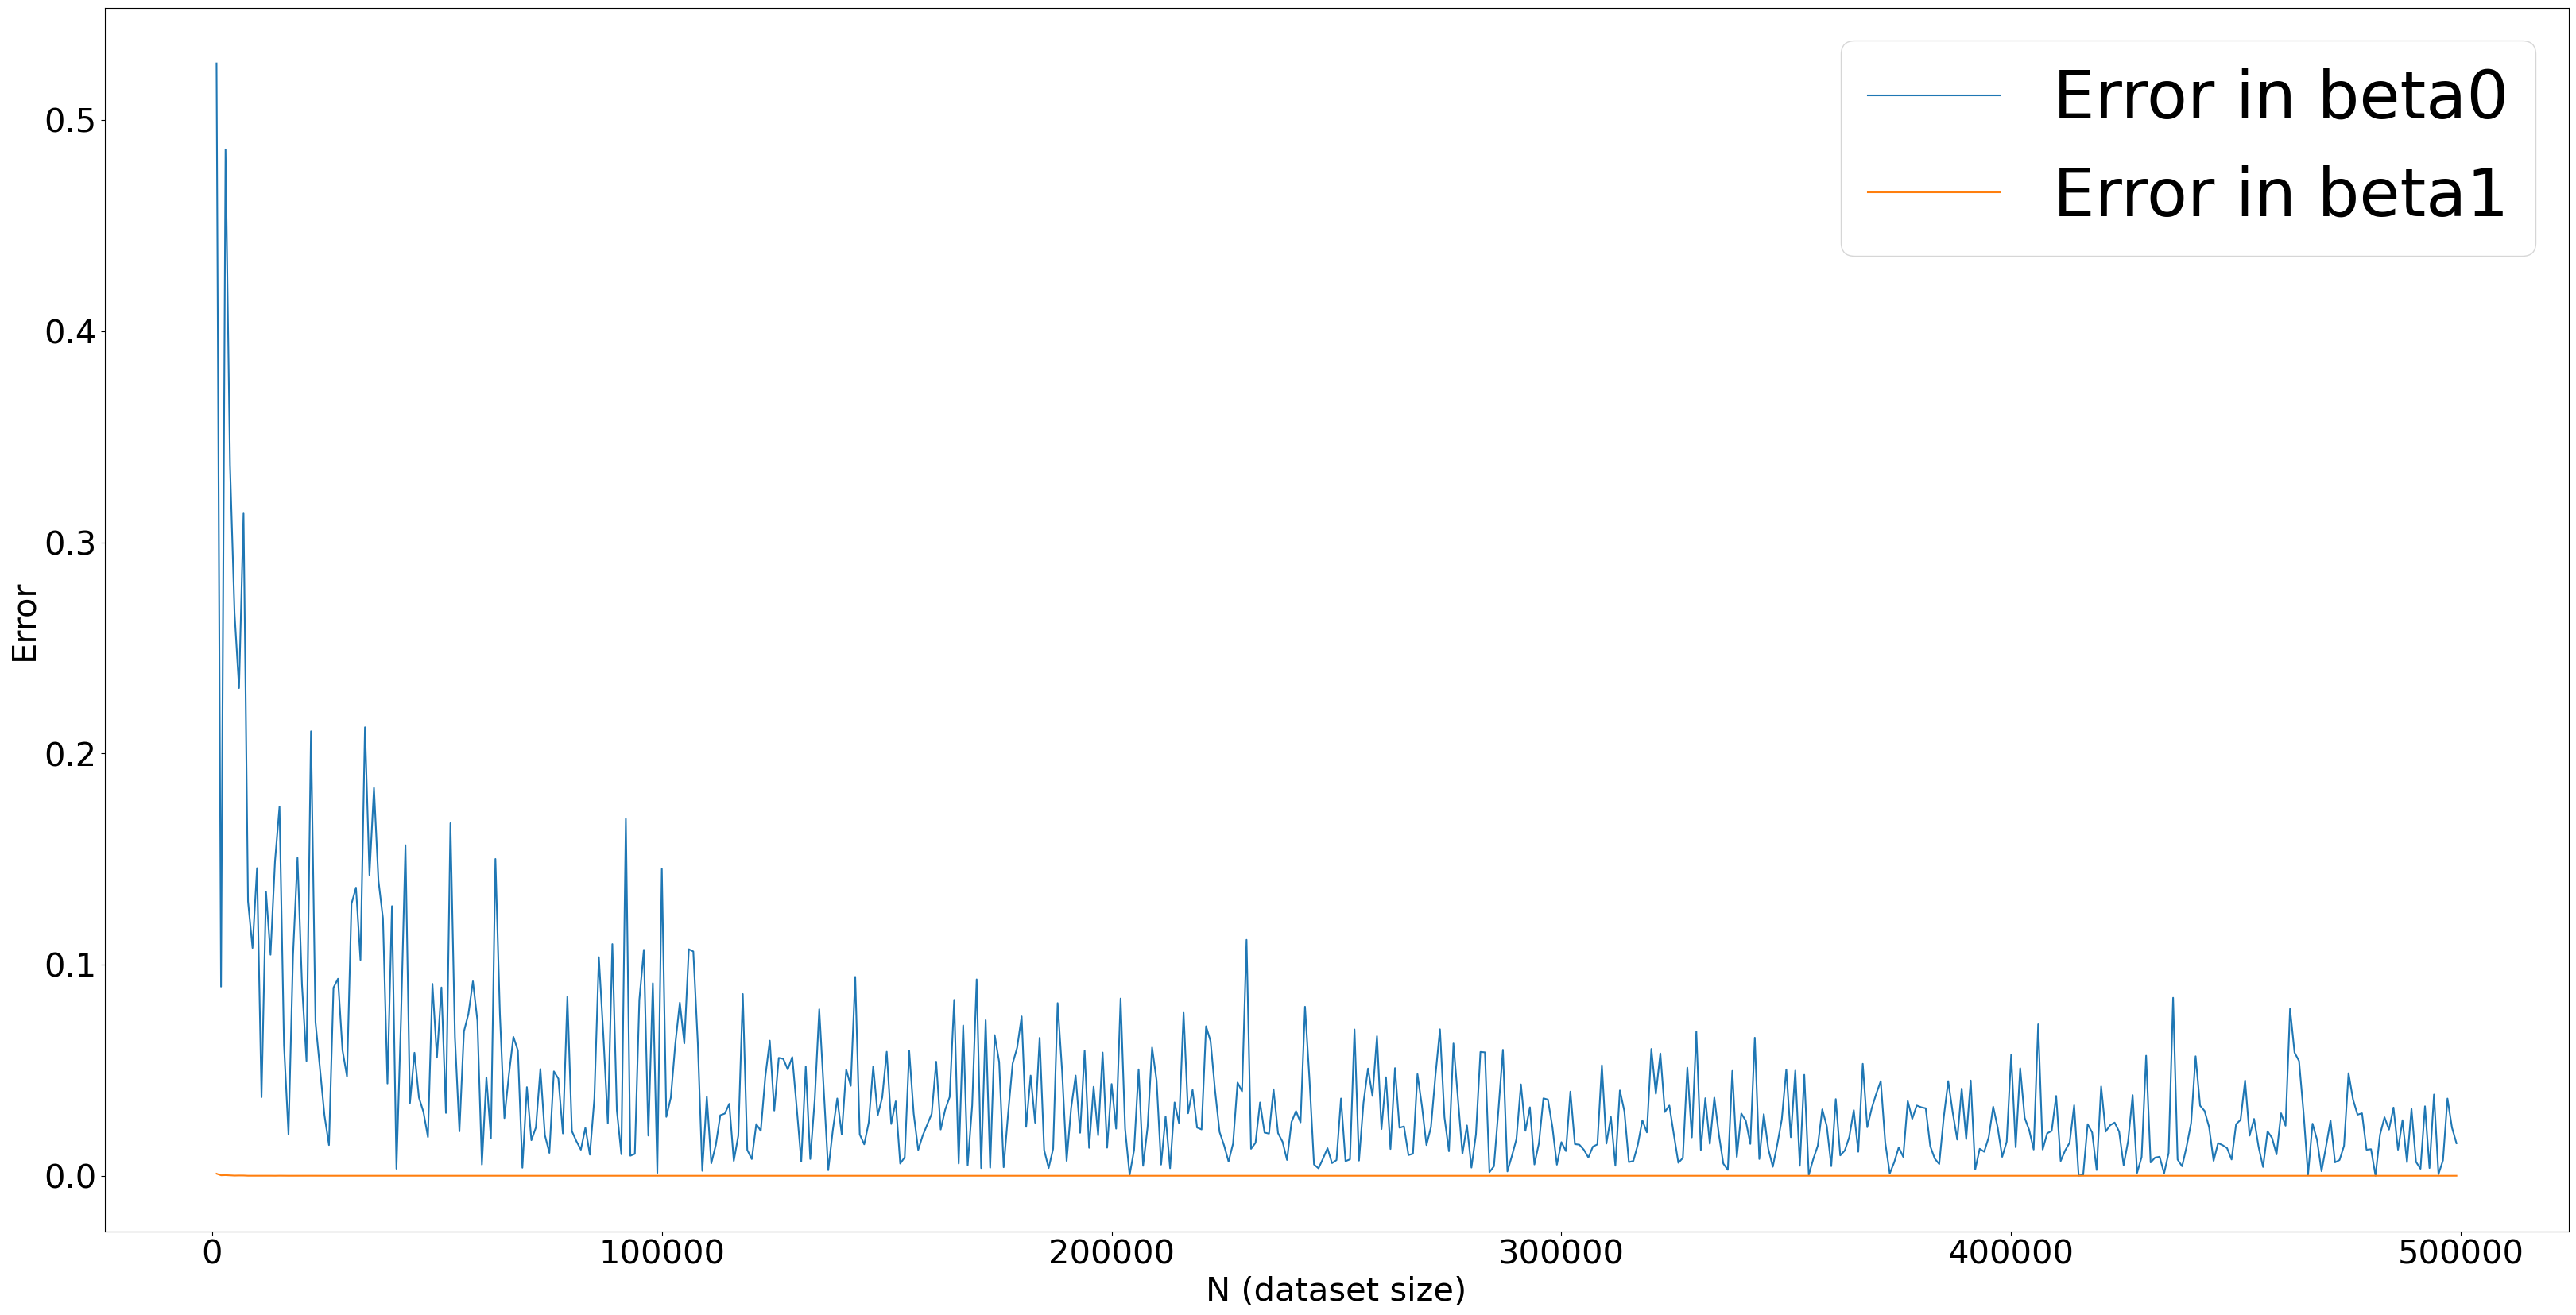

In [17]:
trueBeta0=-1
trueBeta1=3
trueSigma=9
N=np.arange(1000, 500000, 1000)
diff0=[]
diff1=[]
for n in N:
    x=np.arange(n)
    y=generate_simple_model(x, trueBeta0, trueBeta1, trueSigma)
    beta0, beta1=my_lin_reg(x,y)
    diff0.append(abs(trueBeta0-beta0))
    diff1.append(abs(trueBeta1-beta1))

plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(N, diff0, label="Error in beta0")
plt.plot(N, diff1, label="Error in beta1")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("N (dataset size)", size=30)
plt.ylabel("Error", size=30)
plt.show()



It seems to converge all right (NOTICE the y axis scale, and compare with the previous one!). In fact, the error for beta1 is practically zero since very early, while beta0 tends to have a small error.

-----

# Part 3

Let's now use the NYC dataset, having x=hour, as in the slides...

We have to run the least squares algorithm on it.

In [3]:
f=pd.read_csv("pickups_zone_1_15min.csv")
#Same code as above, just for reference (and to initialize the variables, just in case...)

x= np.c_[np.ones(len(f)),f['hour']]
y= np.array(f['pickups'], ndmin=2).T

print(x.size)
print(y.size)
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

525696
262848


As shown in the slides, can you compute the mean absolute error and the root mean squared error?

In [19]:
print("Mean Absolute Error (MAE): %.2f" % np.mean(abs(regr.predict(x) - y)))
print("Root Mean squared error: %.2f" % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Mean Absolute Error (MAE): 80.60
Root Mean squared error: 99.83


Plot a scatter of pickups vs hour, and the fitted line.

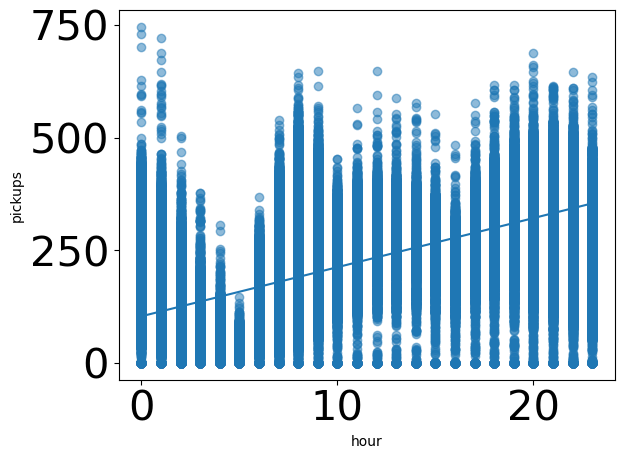

In [20]:
plt.scatter(f['hour'].values, f['pickups'].values, alpha=0.5)
y_pred = regr.predict(x)
plt.plot(f['hour'].values, y_pred )
plt.xlabel("hour")
plt.ylabel("pickups")
plt.show()

Let's check: are the OLS conditions verified?


We now do not know the true distribution. We only have the data. 

For the expected value of epsilon, $E(\epsilon_j)$, we will average from the sample. We have done this exact same thing before, remember?


In [21]:
error=regr.predict(x) - y
print("Expected value of the error (or Average error, AE): %.2f" % np.mean(error))

Expected value of the error (or Average error, AE): 0.00


For the variance of the error term, we can apply the formula from earlier, $\hat{\sigma}^2=\frac{e^T e}{n-2}$

In [22]:
# To make things easier we will convert the 2-D error array to a 1-D array
error = (regr.predict(x) - y).flatten()
print("variance of all data is:", np.dot(error,error)/(len(y)-2))

variance of all data is: 9966.796301284561


Hmmm... There's nothing wrong with these numbers, is there? Well, of course the AE would be 0 for all data! And the variance is one single value (9966.72...), so of course it's... constant!

Well, kind of... We can make some basic checks to see more.

For example, we can split the dataset into two chunks, and check if the variance is the same... An idea: divide data into before noon and after noon.

In [23]:
fmorning=f.loc[f['hour'] <= 12]
fafternoon=f.loc[f['hour'] > 12]

let's now compare the means and variances in the model

In [24]:
x_morning=np.c_[np.ones(len(fmorning)),fmorning['hour']]
y_morning=np.array(fmorning['pickups'], ndmin=2).T
error_morning=(regr.predict(x_morning) - y_morning).flatten()

print("mean of error on morning data is:", np.mean(error_morning))
print("variance of error on morning data is:", np.dot(error_morning,error_morning)/(len(error_morning)-2))

x_afternoon=np.c_[np.ones(len(fafternoon)),fafternoon['hour']]
y_afternoon=np.array(fafternoon['pickups'], ndmin=2).T
error_afternoon=(regr.predict(x_afternoon) - y_afternoon).flatten()

print("mean of error on afternoon data is:", np.mean(error_afternoon))
print("variance of error on afternoon data is:", np.dot(error_afternoon,error_afternoon)/(len(error_afternoon)-2))

mean of error on morning data is: -2.4331944736912665
variance of error on morning data is: 11522.299820830514
mean of error on afternoon data is: 2.8755934689115823
variance of error on afternoon data is: 8128.634729945358


so... a little different, uh? Since the two datasets are extremely large, we can assume that indeed the true variance is not constant. The picture below gives an intuition of what's happening

![alt text](mean_variance_diagram.png "Mean Variance intuition")


If the dataset is so different in those two parts of the day, a solution would be to create two separate models (one for morning, another for the afternoon). But, for the sake of not distracting ourselves, let's keep with a single one for now. 

-----

# Part 4

So, let's play with more variables in our model, starting with hour and minute.

In [4]:
x= np.c_[np.ones(len(f)),f['hour'], f['minute']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);
print(regr.coef_)

[[1.02632496e+02 1.09022384e+01 3.85391811e-02]]


It is now very difficult to visualize, with two x variables!

So, we will now use a 45 degree plot (predicted pickups VS observed pickups)

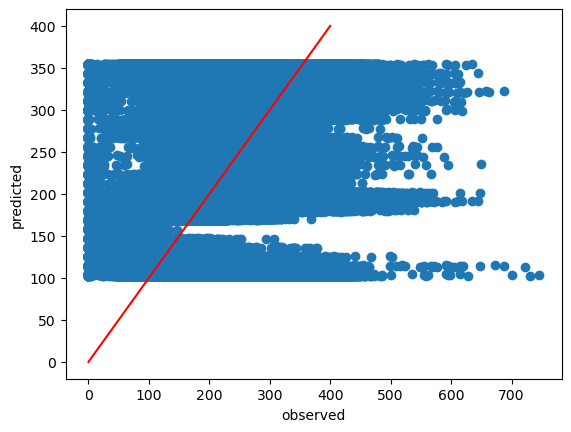

In [5]:
plt.scatter(y, regr.predict(x))
plt.ylabel("predicted")
plt.xlabel("observed")
plt.plot([0, 400], [0, 400], color="red")
plt.show()

Hmmm... it looks TERRIBLE!... What are the error statistics now?

In [8]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Mean Absolute error (MAE): 80.60
Root Mean squared error: 99.83


Wow, it did NOT improve AT ALL!!!!  :-(  

Let's take a look at the correlations, to understand why.

In [7]:
f.iloc[:,1:].corr()

,hour,minute,pickups
hour,1.000000e+00,4.241817e-18,0.603024
minute,4.241817e-18,1.000000e+00,0.005164
pickups,6.030243e-01,5.164456e-03,1.000000


What if we added the pickup lags instead?

Here the lag function we used last week:

In [19]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

Let's also create a function to make our 45 degree linear regression plots and provide some statistics at one go:

In [10]:
def my_plot(regr, x, y, size=0.1):

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))
          
    # Plot outputs
    plt.scatter(y, regr.predict(x), color='blue',linewidth=3)
    plt.plot([0, 800], [0, 800], color="red")
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
    plt.xlabel("observed")
    plt.ylabel("predicted")
    
    plt.show()

In [11]:
f_lagged=buildLaggedFeatures(f, ['pickups'], lag=2)
fllen=len(f_lagged)

In [12]:
f_lagged.head()

,date,hour,minute,pickups,pickups_lag1,pickups_lag2
2,2009-01-01,0,30,215,166.0,0.0
3,2009-01-01,0,45,223,215.0,166.0
4,2009-01-01,1,0,245,223.0,215.0
5,2009-01-01,1,15,182,245.0,223.0
6,2009-01-01,1,30,181,182.0,245.0


And we have a more complete model now... what about the results?

In [13]:
x=np.c_[np.ones(len(f_lagged)),f_lagged['pickups_lag1'], f_lagged['pickups_lag2']]

In [14]:
y=np.array(f_lagged['pickups'], ndmin=2).T

In [15]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

Coefficients: 
 [[5.30465767e+00 9.71728221e-01 5.09589615e-03]]
Mean Absolute error (MAE): 20.39
Root Mean squared error: 26.85
Variance score: 0.95


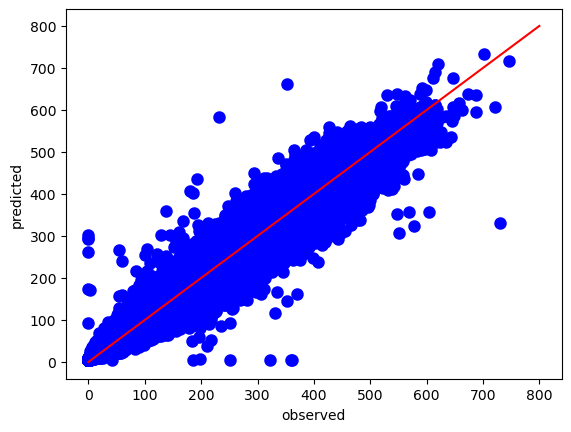

In [16]:
my_plot(regr, x, y)


Yes, waaaay better!... :-)

_Now, it's your turn! Can you improve this model further?_

In [ ]:
# dunno